# Data: Impermium_verification_labels

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
from IPython.display import clear_output

from sklearn.model_selection import train_test_split

In [2]:
# data load
data = pd.read_csv('./data/impermium_verification_labels.csv', delimiter = ',', skiprows = 1,
                   names = ['id', 'Insult', 'Date', 'Comment', 'Usage'], usecols=['Insult', 'Comment'])

In [3]:
data.head(10)

,Insult,Comment
0,0,"""like this if you are a tribe fan"""
1,1,"""you're idiot......................."""
2,1,"""I am a woman Babs, and the only ""war on women..."
3,1,"""WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F..."
4,1,"""haha green me red you now loser whos winning ..."
5,0,"""\nMe and God both hate-faggots.\n\nWhat's the..."
6,1,"""Oh go kiss the ass of a goat....and you DUMMY..."
7,0,"""Not a chance Kid, you're wrong."""
8,0,"""On Some real Shit FUck LIVE JASMIN!!!"""
9,1,"""ok but where the hell was it released?you all..."


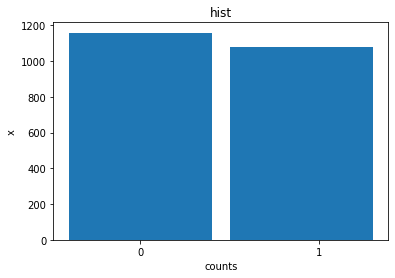

In [4]:
counts, bins = np.histogram(data['Insult'])

y = counts
x = bins[:-1]
xlabel = [0, 1]
plt.title("hist")
plt.bar(x, y)
plt.xticks(xlabel)
plt.yticks()
plt.xlabel("counts")
plt.ylabel("x")
plt.show()

In [5]:
data['Comment'].values

array(['"like this if you are a tribe fan"',
       '"you\'re idiot......................."',
       '"I am a woman Babs, and the only "war on women" I see is coming from jackazzes like you.\\xa0 I don\'t need your protection or your ignorant rhetoric masquerading as representing my best interests.\\xa0 "',
       ...,
       '"sweetie pie is looking very much like her cousin Maggie E...WHAT A BEAUTY THIS LITTLE ONE IS..Love you all to pieces !!"',
       '"ball4real where are you with your miami g-ayness"',
       '"Man....if you are a 3 point shooter, you must love playing with Wade and Bron. "'],
      dtype=object)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['Comment'].values, data['Insult'].values, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(1788,)

In [8]:
X_train[:10]

array(['"Of course you would say that"',
       '"Go back into hiding Bush... America still hasn\'t gotten over your failed presidency"',
       '"Look again. This isn\'t about the control room when *spoilers* you kill guilty spark.. its when you do the warthog run... it\'s not "false". When the pannels begin to fall, you are at the silent cartographer\'s island."',
       '"Are you and Orochimaru bu.tt buddies too? Disgusting"',
       '"@Fuck:disqus\\xa0@cunt:disqus\\xa0@shit:disqus\\xa0\\n\\n@Fuck:disqus\\xa0you CNN, I know you certainly have a lot to do with the untimely ends of several of our fellow commenters. \\xa0You tried many times to get me, but I\'m always a step ahead of you."',
       '"How would you like to call that mom!"',
       '"No sir. I love black men and wouldnt trade them for the world. Always treated with respect and always knew how to pick them well cause my mother and father taught me well. No kids btw and currently studying. But ignorant black men like you j

In [9]:
X_test.shape

(447,)

In [10]:
X_test[:10]

array(['"Are you ever going to show us some cock or butt?"',
       '"You may be right.\\xa0"',
       '"EVELYN WE NEW YOU WERE TRASH IN THE BEGINNING BUT AS THE SHOW GREW YOU GOT OUT OF CONTROL AND REALLY SHOWED THE WORLD WHO YOU REALLY ARE TRASH. TRASH IS WHAT YOU ARE AND YOU AND CHAD ARE DESERVING OF EACH OTHER! YOU ALL ARE FROM THE SAME FLOCK!"',
       '"I\'m guessing English is not your first language. He was being sarcastic."',
       '"Pretend you\'re a gentleman for a little while and grow up little man.  The adults are talking..."',
       '"Notice they were listed as good manners...\\n\\n..for children.\\n\\nWhich leaves me way in the fucking clear. Fuck Erasmus, anyway.\\xa0 Preachy old fuck. "',
       '"Girls need to learn when to shut up, she is beautiful, she knows it and that\'s all that really matters you don\'t know if she unhealthy, be quiet with your words of hate we (the majority of women) are tired if the hate."',
       '"Racist?  Seriously?  How stupid are you,

In [11]:
y_test.shape

(447,)

In [12]:
y_test[:10]

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

# Preprocessing for BERT

In [13]:
#!pip install ktrain

In [14]:
import ktrain
from ktrain import text

using Keras version: 2.2.4-tf


- IMDB

In [15]:
# (pre_X_train, pre_y_train), (pre_X_test, pre_y_test), preproc = text.texts_from_folder('./data/aclImdb', 
#                                                                        maxlen=500, 
#                                                                        preprocess_mode='bert',
#                                                                        train_test_names=['train', 
#                                                                                          'test'],
#                                                                        classes=['pos', 'neg'])

- Impermium_verification_labels

In [16]:
max_seq_length = 100
max_features=8000

- References: https://github.com/amaiya/ktrain/blob/master/ktrain/text/data.py

In [17]:
(pre_X_train, pre_y_train), (pre_X_test, pre_y_test), preproc = text.texts_from_array(X_train, y_train, X_test, y_test, 
                   class_names = [0, 1],
                   max_features=max_features, maxlen=max_seq_length, 
                   val_pct=0.1, ngram_range=1, preprocess_mode='bert', 
                   lang=None, # auto-detected
                   random_state=42,
                   verbose=1)

preprocessing train...
language: en


preprocessing test...
language: en


In [18]:
np.array(pre_X_train).shape

(2, 1788, 100)

In [19]:
pre_X_train

[array([[ 101, 1000, 1997, ...,    0,    0,    0],
        [ 101, 1000, 2175, ...,    0,    0,    0],
        [ 101, 1000, 2298, ...,    0,    0,    0],
        ...,
        [ 101, 1000, 1045, ...,    0,    0,    0],
        [ 101, 1000, 8100, ...,    0,    0,    0],
        [ 101, 1000, 5292, ...,    0,    0,    0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [20]:
pre_y_train.shape

(1788, 2)

In [21]:
pre_y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# BERT (ktrain module)

In [22]:
model = text.text_classifier('bert', (pre_X_train, pre_y_train) , preproc=preproc)

Is Multi-Label? False
maxlen is 100
done.


In [23]:
learner = ktrain.get_learner(model, 
                             train_data=(pre_X_train, pre_y_train), 
                             val_data=(pre_X_test, pre_y_test), 
                             batch_size=32)

In [24]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Train on 1788 samples
Epoch 1/1024
1788/1788 [==============================] - 39s 22ms/sample - loss: 0.9826 - acc: 0.5218
Epoch 2/1024
1788/1788 [==============================] - 34s 19ms/sample - loss: 0.8995 - acc: 0.5218
Epoch 3/1024
1788/1788 [==============================] - 34s 19ms/sample - loss: 0.7745 - acc: 0.5218
Epoch 4/1024
1788/1788 [==============================] - 34s 19ms/sample - loss: 0.6962 - acc: 0.5481
Epoch 5/1024
1788/1788 [==============================] - 34s 19ms/sample - loss: 0.6655 - acc: 0.6191
Epoch 6/1024
1788/1788 [==============================] - 34s 19ms/sample - loss: 0.6154 - acc: 0.6667
Epoch 7/1024
1788/1788 [==============================] - 34s 19ms/sample - loss: 0.5272 - acc: 0.7360
Epoch 8/1024
1788/1788 [==============================] - 34s 19ms/sample - loss: 0.4027 - acc: 0.8255
Epoch 9/1024
1788/1788 [==============================] - 34s 19ms/samp

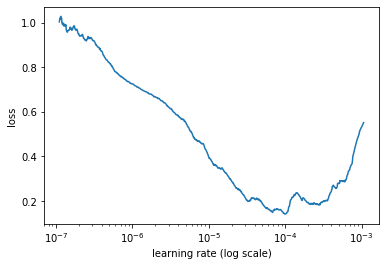

In [25]:
learner.lr_plot()

In [26]:
# 2e-5 is one of the LRs  recommended by Google and is consistent with the plot above.
learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Train on 1788 samples, validate on 447 samples
Epoch 1/5
1788/1788 [==============================] - 40s 22ms/sample - loss: 0.7808 - acc: 0.5347 - val_loss: 0.6646 - val_acc: 0.6421
Epoch 2/5
1788/1788 [==============================] - 37s 21ms/sample - loss: 0.6231 - acc: 0.6790 - val_loss: 0.5366 - val_acc: 0.7338
Epoch 3/5
1788/1788 [==============================] - 37s 21ms/sample - loss: 0.4582 - acc: 0.7707 - val_loss: 0.4538 - val_acc: 0.8009
Epoch 4/5
1788/1788 [==============================] - 37s 21ms/sample - loss: 0.3046 - acc: 0.8758 - val_loss: 0.4647 - val_acc: 0.7964
Epoch 5/5
1788/1788 [==============================] - 37s 21ms/sample - loss: 0.1672 - acc: 0.9418 - val_loss: 0.4650 - val_acc: 0.8188


In [27]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [28]:
pred = predictor.predict(X_test)

In [29]:
slicing_num = len(pred)

In [30]:
count = 0

for i in range(slicing_num):
#     print('pred:', pred[i])
#     print('y_test', y_test[i])
    if pred[i] == y_test[i]:
        count = count + 1

In [31]:
float(count / slicing_num)

0.8187919463087249